# Detroit Crime Data Analysis: Exploration and Visualization

Detroit has long held the reputation of harboring one of the highest crime rates in the U.S, safer than only [2% of U.S. cities](https://www.neighborhoodscout.com/mi/detroit/crime). While Detroit has struggled with this issue for decades, the city has been taking measures to improve its crime rates, and the [Detroit News](https://www.detroitnews.com/story/news/local/detroit-city/2019/01/02/detroit-police-overall-violent-crime-reduced-2/2464989002/) reported in 2019 that overall violent crime has decreased by 2% in recent years. 


This project will examine [Detroit crime data](https://data.detroitmi.gov/datasets/0825badfe6304620a998d162be0e135e_0?geometry=-83.620%2C42.264%2C-82.578%2C42.442&page=10) **(now redacted)**, found through the City of Detroit Open Data Portal. I selected this dataset because it contained various features, such as council districts, neighborhoods, day and hour of each incidents, and more, that I believed would enable interesting exploration. As a brief disclaimer, no metadata information was available for the dataset, so there are points where it is advisable to take findings with a grain of salt.


The following sections are outlined as follows:

I. Prepping Data

II. Identifying and Visualizing Trends
    - A. Types and Frequencies of Crimes
    - B. Crime Across Time
    - C. General Crime Trends Across Neighborhoods and Council Districts
    - D. Examining Dangerous Drugs, Aggravated Assault, Sex Offenses, and Homicide Across Council Districts

III. Hypothesis Testing

IV. Summary 

Let's begin!

## I. Prepping Data

In [2]:
#importing modules

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading in dataset
crimedata = pd.read_csv("RMS_Crime_Incidents.csv")

In [4]:
#printing first 5 rows...
crimedata.head()

X          Y  crime_id  report_number                   address  \
0 -83.174939  42.416632   3147483     1711220276  Ward St & W McNichols Rd   
1 -83.177291  42.353689   3152178     1712040395   Schaefer & Schaefer Hwy   
2 -83.194828  42.396815   3165663     1801140035      Sussex St & Eaton St   
3 -83.166515  42.264115   3164221     1801100075   S Waring St & Peters St   
4 -83.145592  42.376032   3182393     1803030039   Bryden St & Elmhurst St   

                  offense_description offense_category  state_offense_code  \
0  ASSAULT AND BATTERY/SIMPLE ASSAULT          ASSAULT                1301   
1  ASSAULT AND BATTERY/SIMPLE ASSAULT          ASSAULT                1301   
2  ASSAULT AND BATTERY/SIMPLE ASSAULT          ASSAULT                1301   
3  ASSAULT AND BATTERY/SIMPLE ASSAULT          ASSAULT                1301   
4  ASSAULT AND BATTERY/SIMPLE ASSAULT          ASSAULT                1301   

  arrest_charge                  charge_description  ...  year scout_car_area  \
0         13001  ASSAULT AND BATTERY/SIMPLE ASSAULT  ...  2017           1207   
1         13001  ASSAULT AND BATTERY/SIMPLE ASSAULT  ...  2017           0207   
2         13001  ASSAULT AND BATTERY/SIMPLE ASSAULT  ...  2018           0202   
3         13001  ASSAULT AND BATTERY/SIMPLE ASSAULT  ...  2018           0415   
4         13001  ASSAULT AND BATTERY/SIMPLE ASSAULT  ...  2018           1004   

   precinct         block_id           neighborhood council_district zip_code  \
0        12  261635395001022                Schulze                2    48235   
1        02  261635350001002           Joy-Schaefer                7    48228   
2        02  261635377003006         Hubbell-Lyndon                1    48227   
3        04  261635248005015                Boynton                6    48217   
4        10  261635341002017  Oakman Blvd Community                7    48204   

   longitude   latitude       oid  
0 -83.174939  42.416632  50153059  
1 -83.177291  42.353689  50153060  
2 -83.194828  42.396815  50153061  
3 -83.166515  42.264115  50153062  
4 -83.145592  42.376032  50153063  

[5 rows x 24 columns]

In [6]:
#looking at column types
crimedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284121 entries, 0 to 284120
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   X                    284121 non-null  float64
 1   Y                    284121 non-null  float64
 2   crime_id             284121 non-null  int64  
 3   report_number        284121 non-null  int64  
 4   address              284121 non-null  object 
 5   offense_description  284121 non-null  object 
 6   offense_category     284121 non-null  object 
 7   state_offense_code   284121 non-null  int64  
 8   arrest_charge        284121 non-null  object 
 9   charge_description   284121 non-null  object 
 10  incident_timestamp   284121 non-null  object 
 11  incident_time        284121 non-null  object 
 12  day_of_week          284121 non-null  int64  
 13  hour_of_day          284121 non-null  int64  
 14  year                 284121 non-null  int64  
 15  scout_car_area   

In [7]:
#converting "incident_timestamp" and "incident_time" to datetime format
crimedata['incident_timestamp'] = pd.to_datetime(crimedata['incident_timestamp'])
crimedata['incident_time'] = pd.to_datetime(crimedata['incident_time'])

It should be noted that while this dataset technically extends as far back as the 1910's, very few rows actually contain that value. In fact, the vast majority of the data is from 2016 and on:

In [8]:
crimedata['year'].value_counts()

2019    83880
2018    82224
2017    81445
2020    29073
2016     6113
2015      353
2014      244
2013      179
2012      134
2010      102
2011       95
2009       46
2008       39
2007       39
2006       18
2000       16
2001       16
2002       15
2005       11
2004       11
2003        8
1999        7
1978        5
1920        4
1989        4
1998        3
1997        3
1994        3
1991        3
1984        2
1918        2
1973        2
1977        2
1983        2
1915        2
1986        2
1995        2
1985        1
1981        1
1980        1
1987        1
1988        1
1976        1
1990        1
1963        1
1961        1
1951        1
1992        1
1996        1
Name: year, dtype: int64

The underwhelming number of reports prior to 2017 (and especially pre-21st century) is likely due to changes in data collection or even typos. No doubt 1996 had more than a single instance of crime that year! In fact, data from 2015 and before accounts for only .049% of the data! With that said, reasonable inferences can't be made from this particular subset, and since the number of rows is so minimal, we will simply drop them and focus on the reports from 2017 and on.

In [9]:
#dropping rows
crimedata = crimedata[crimedata['year'] > 2016]

In [10]:
#number remaining
print("Number of rows remaining: " + str(len(crimedata)))

Number of rows remaining: 276622


In [11]:
#Since there is no separate month column, let's create one
crimedata['month'] = pd.DatetimeIndex(crimedata['incident_timestamp']).month

In [12]:
crimedata.describe()

X              Y      crime_id  report_number  \
count  276622.000000  276622.000000  2.766220e+05   2.766220e+05   
mean      -83.108462      42.389471  3.263073e+06   1.829486e+09   
std         0.097561       0.037961  1.423055e+05   9.869237e+07   
min       -83.287776      42.255507  3.008392e+06   1.703303e+08   
25%       -83.195098      42.358903  3.139642e+06   1.711070e+09   
50%       -83.116753      42.394102  3.265824e+06   1.809170e+09   
75%       -83.027874      42.422257  3.386924e+06   1.907210e+09   
max       -82.910296      42.450498  3.504149e+06   2.050100e+09   

       state_offense_code    day_of_week    hour_of_day           year  \
count       276622.000000  276622.000000  276622.000000  276622.000000   
mean          2356.985305       3.987774      11.655024    2018.219003   
std           1121.693029       1.997088       7.510578       0.984936   
min            901.000000       1.000000       0.000000    2017.000000   
25%           1302.000000       2.000000       4.000000    2017.000000   
50%           2305.000000       4.000000      13.000000    2018.000000   
75%           2900.000000       6.000000      19.000000    2019.000000   
max           9915.000000       7.000000      23.000000    2020.000000   

           block_id  council_district       zip_code      longitude  \
count  2.766220e+05     276622.000000  276622.000000  276622.000000   
mean   2.616353e+14          3.998174   48218.985793     -83.108462   
std    3.430966e+08          2.037770      11.310009       0.097561   
min    2.616350e+14          1.000000   48201.000000     -83.287776   
25%    2.616351e+14          2.000000   48208.000000     -83.195098   
50%    2.616353e+14          4.000000   48219.000000     -83.116753   
75%    2.616354e+14          6.000000   48228.000000     -83.027874   
max    2.616399e+14          7.000000   48243.000000     -82.910296   

            latitude           oid          month  
count  276622.000000  2.766220e+05  276622.000000  
mean       42.389471  5.029514e+07       6.250425  
std         0.037961  8.200020e+04       3.386928  
min        42.255507  5.015306e+07       1.000000  
25%        42.358903  5.022435e+07       3.000000  
50%        42.394102  5.029519e+07       6.000000  
75%        42.422257  5.036615e+07       9.000000  
max        42.450498  5.043718e+07      12.000000

Fortunately, there isn't a single value missing, so we don't need to worry about dropping or imputing values. Time to start digging into the data!

## II. Identifying and Visualizing Trends

Let's start with identifying frequency rates by crime category.

### A. Types and Frequencies of Crimes

In [12]:
#making list of unique values and their counts
crimedata['offense_category'].value_counts()

ASSAULT                   50017
LARCENY                   43871
DAMAGE TO PROPERTY        33702
AGGRAVATED ASSAULT        27261
BURGLARY                  25206
STOLEN VEHICLE            23064
FRAUD                     22035
ROBBERY                    7843
DANGEROUS DRUGS            7196
WEAPONS OFFENSES           6078
SEX OFFENSES               4482
OBSTRUCTING JUDICIARY      4007
ARSON                      2677
OUIL                       2564
STOLEN PROPERTY            2503
SEXUAL ASSAULT             2501
FAMILY OFFENSE             2027
MISCELLANEOUS              1853
OBSTRUCTING THE POLICE     1353
RUNAWAY                    1335
DISORDERLY CONDUCT         1140
FORGERY                     934
HOMICIDE                    870
OTHER                       860
KIDNAPPING                  668
LIQUOR                      341
EXTORTION                   153
JUSTIFIABLE HOMICIDE         51
SOLICITATION                 24
GAMBLING                      6
Name: offense_category, dtype: int64

Text(0, 0.5, 'Frequency of Crime')

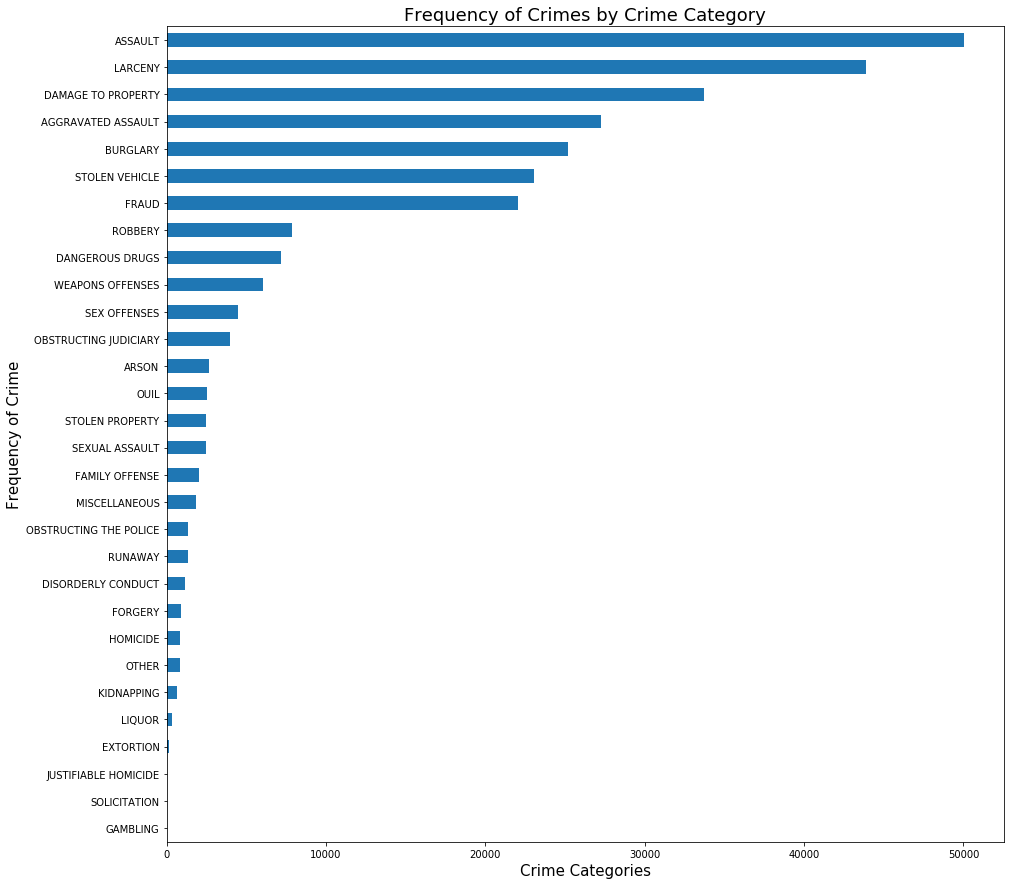

In [13]:
#plotting histogram for scale
fig = plt.figure(figsize = (15, 15))
ax = crimedata['offense_category'].value_counts().plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Frequency of Crimes by Crime Category", fontsize = 18)
plt.xlabel("Crime Categories", fontsize = 15)
plt.ylabel("Frequency of Crime", fontsize = 15)

Looks like assault, larceny, damage to property, aggravated assault, and burglary are the top 5 most frequently occuring types of crime during the recorded period. Combined, they account for about 65% of the total listed crimes. 

### B. Crime Across Time

Text(0, 0.5, 'Frequency of Crime')

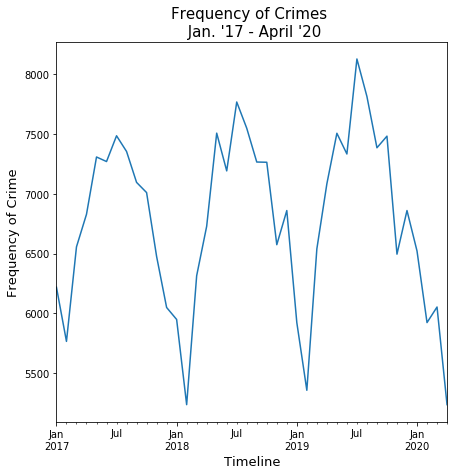

In [14]:
#plotting overall time trend through April of 2020
fig, ax = plt.subplots(figsize=(7,7))
plot_data = crimedata.groupby(pd.Grouper(key='incident_timestamp', freq='M')).count()['report_number']
ax = plot_data.plot(ax=ax)
ax.set_xlim(['2017-01-01' , '2020-4-30'])
plt.title("Frequency of Crimes \n Jan. '17 - April '20", fontsize = 15)
plt.xlabel("Timeline", fontsize = 13)
plt.ylabel("Frequency of Crime", fontsize = 13)

Like that of many areas, Detroit's crime rates fluctuate with the seasons.

Next, let's look at crime distribution across months and days of the week.

In [15]:
crimedata['month'].value_counts()

5     27704
4     25875
3     25464
1     24615
7     23372
8     22709
2     22289
6     21789
10    21751
9     21741
12    19768
11    19545
Name: month, dtype: int64

Text(0, 0.5, 'Crime Frequency')

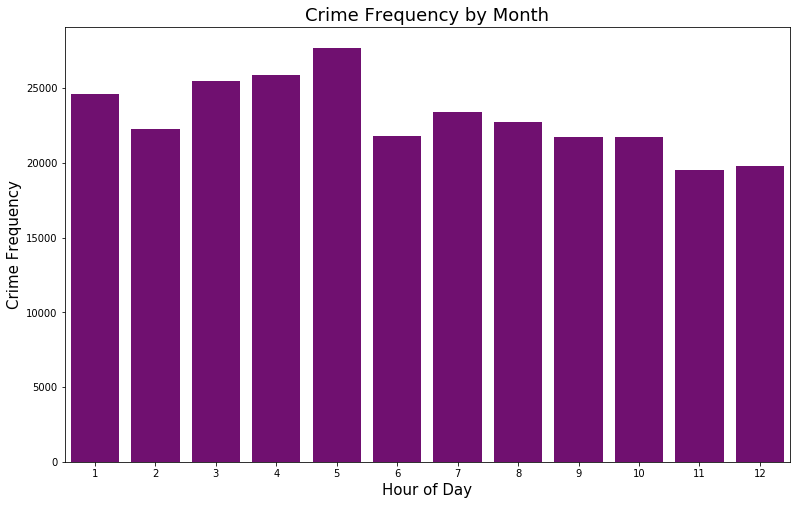

In [16]:
plt.figure(figsize=(13,8))
sns.countplot(crimedata['month'], color='purple')
plt.title('Crime Frequency by Month', fontsize = 18)
plt.xlabel('Hour of Day', fontsize = 15)
plt.ylabel('Crime Frequency', fontsize = 15)

In [17]:
#grabbing total crime counts for each day
d1=(crimedata['day_of_week'] == 1).sum()
d2=(crimedata['day_of_week'] == 2).sum()
d3=(crimedata['day_of_week'] == 3).sum()
d4=(crimedata['day_of_week'] == 4).sum()
d5=(crimedata['day_of_week'] == 5).sum()
d6=(crimedata['day_of_week'] == 6).sum()
d7=(crimedata['day_of_week'] == 7).sum()

Text(0.5, 1.0, 'Crime Frequencies by Day of the Week')

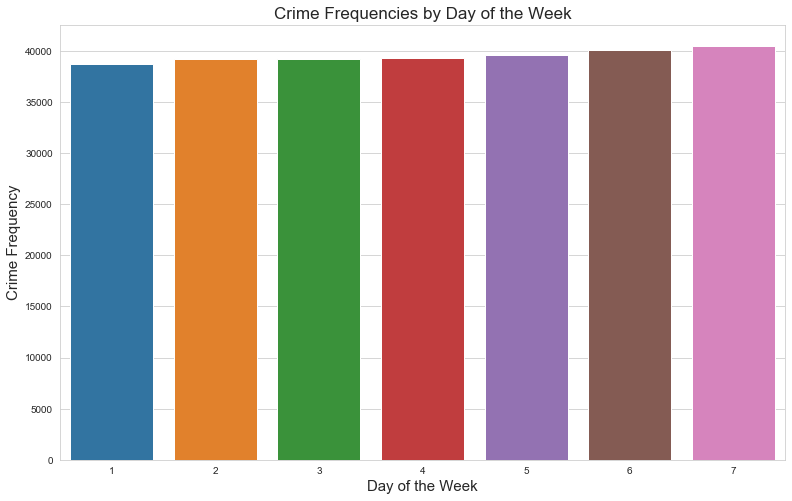

In [18]:
sns.set_style('whitegrid')
plt.figure(figsize=(13,8))
g = sns.barplot(x=[d1, d2, d3, d4, d5, d6, d7, d7],y=[d1, d2, d3, d4, d5, d6, d7, d7])
g.set(xticklabels=["1", "2", "3", "4", "5", "6", "7"])
plt.ylabel('Crime Frequency', fontsize = 15)
plt.xlabel('Day of the Week', fontsize = 15)
plt.title("Crime Frequencies by Day of the Week", fontsize = 17)

It should be noted that nowhere on the original source page does it say whether "1" is supposed to denote Sunday or Monday, so this is important to keep in mind.

Otherwise, total counts for each day actually look quite similar, thus day of the week isn't a great predictor of overall crime trends. Perhaps we'll observe something more interesting regarding time of day.

In [19]:
crimedata['hour_of_day'].value_counts()

4     17063
21    14401
16    14381
20    14301
2     14214
22    14121
3     13983
1     13866
5     13806
0     13646
23    13352
17    13196
19    13069
18    12119
15    11520
14    10995
6     10173
13     9462
7      8656
12     7548
8      6866
9      5669
11     5390
10     4825
Name: hour_of_day, dtype: int64

Text(0, 0.5, 'Crime Frequency')

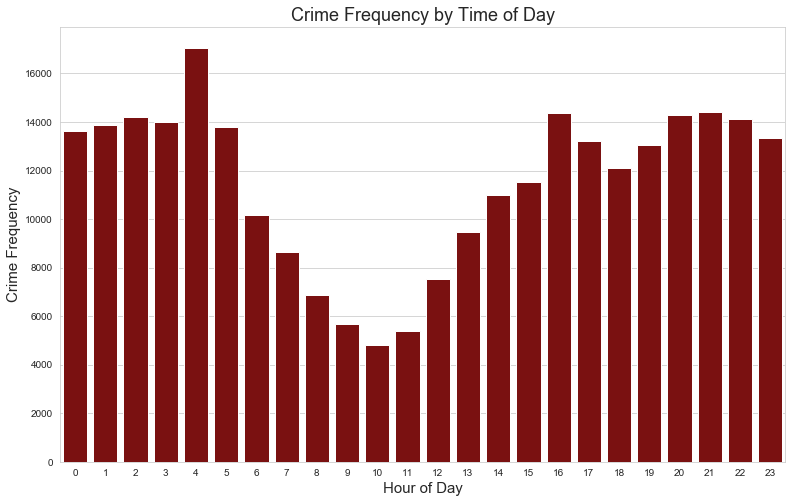

In [20]:
plt.figure(figsize=(13,8))
sns.countplot(crimedata['hour_of_day'], color = 'darkred')
plt.title('Crime Frequency by Time of Day', fontsize = 18)
plt.xlabel('Hour of Day', fontsize = 15)
plt.ylabel('Crime Frequency', fontsize = 15)

Unsurprisingly, most crime tends to occur at night or early in the morning. For comparison, crime at 4am occurs about 3.5x more than crime at 10am. 

Now let's examine the 10 most frequent crimes by day of the week.

In [21]:
crimedata.groupby('day_of_week')['offense_category'].apply(lambda x: x.value_counts().head(10))

day_of_week                    
1            ASSAULT               7440
             LARCENY               6271
             DAMAGE TO PROPERTY    4932
             BURGLARY              3934
             AGGRAVATED ASSAULT    3925
                                   ... 
7            STOLEN VEHICLE        3217
             FRAUD                 2137
             ROBBERY               1101
             WEAPONS OFFENSES       790
             DANGEROUS DRUGS        640
Name: offense_category, Length: 70, dtype: int64

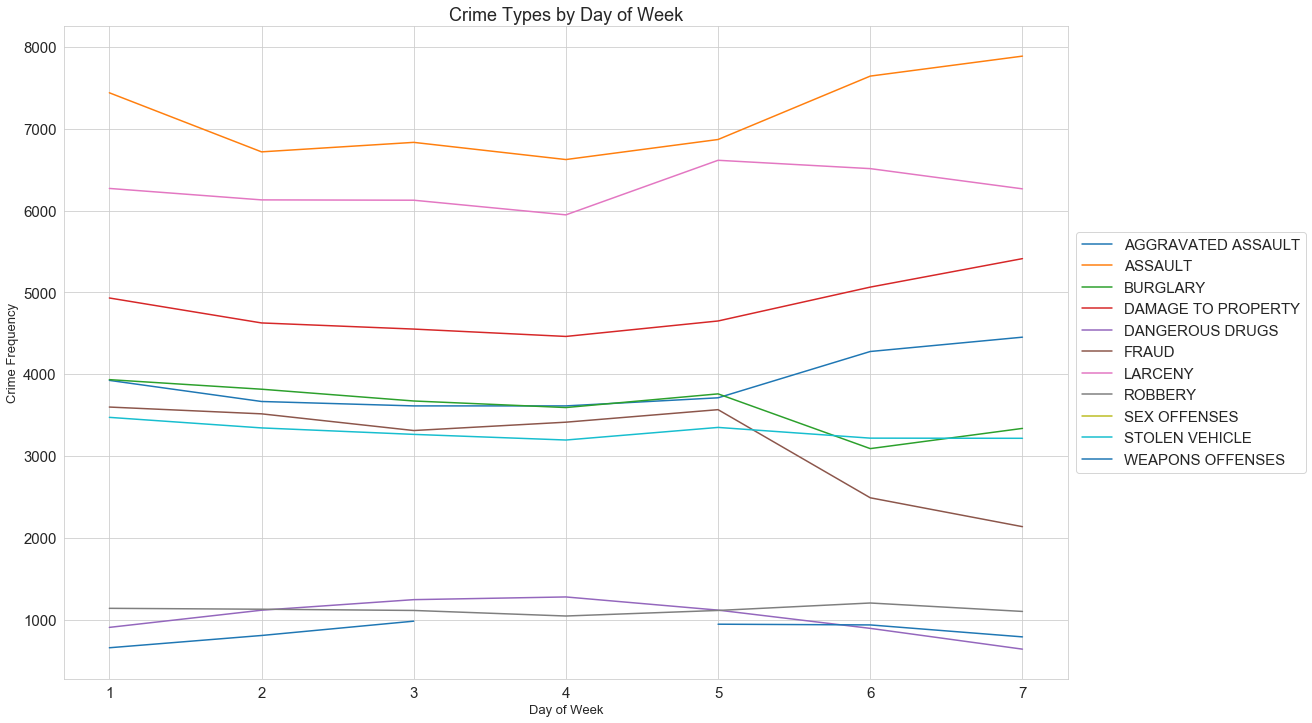

In [22]:
fig, ax = plt.subplots(figsize=(18,12))
crimedata.groupby('day_of_week')['offense_category'].apply(lambda x: x.value_counts().head(10)).unstack().plot(ax=ax)
plt.title('Crime Types by Day of Week', fontsize = 18)
ax.set_xlabel('Day of Week', fontsize = 13)
ax.set_ylabel('Crime Frequency', fontsize = 13)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={"size":15})

Gaps in the plot are due to lack of datapoints for certain hour/crime combinations....

Most noticably, assault and damage to property appear to occur more over the weekend, while burglaries and fraud actually dip somewhat. 

Let's do this again, but with hour of the day.

In [23]:
crimedata.groupby('hour_of_day')['offense_category'].apply(lambda x: x.value_counts().head(10))

hour_of_day                    
0            ASSAULT               2398
             LARCENY               2180
             DAMAGE TO PROPERTY    1663
             AGGRAVATED ASSAULT    1436
             STOLEN VEHICLE        1369
                                   ... 
23           STOLEN VEHICLE        1039
             FRAUD                  669
             DANGEROUS DRUGS        455
             SEX OFFENSES           405
             ROBBERY                399
Name: offense_category, Length: 240, dtype: int64

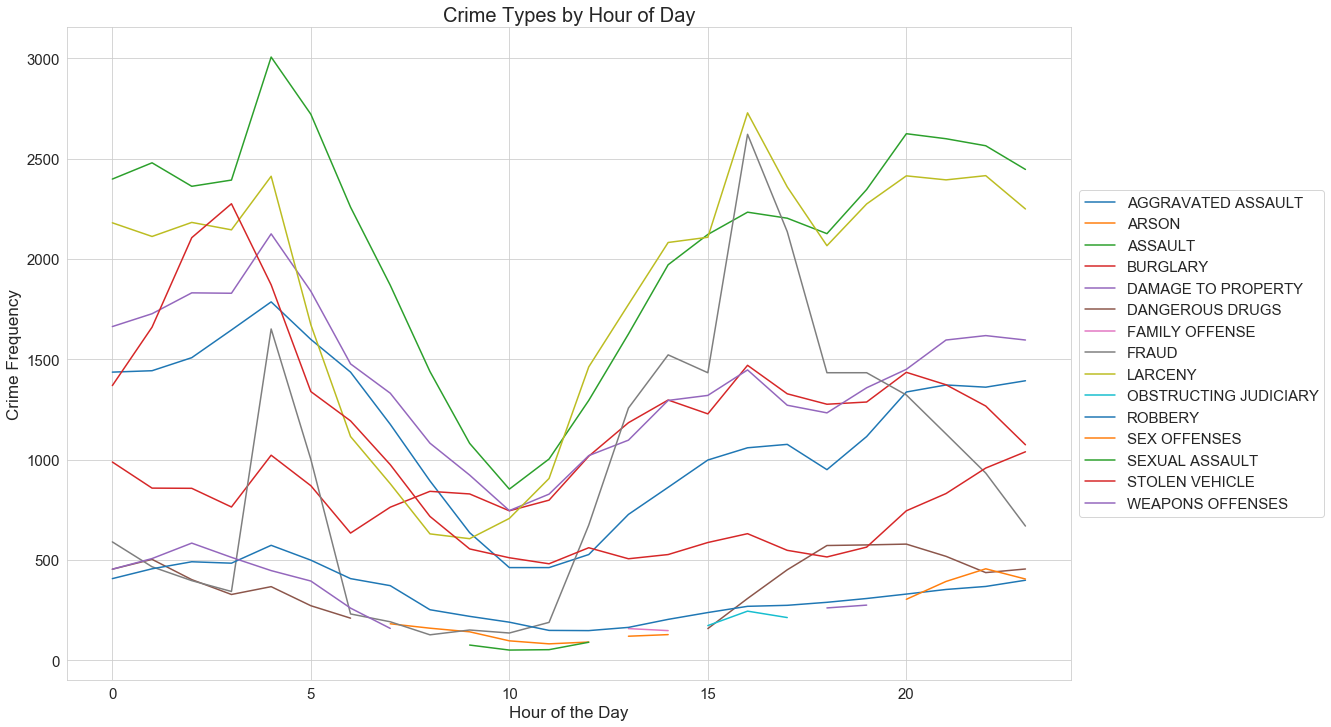

In [24]:
fig, ax = plt.subplots(figsize=(18,12))
crimedata.groupby('hour_of_day')['offense_category'].apply(lambda x: x.value_counts().head(10)).unstack().plot(ax=ax)
plt.title('Crime Types by Hour of Day', fontsize = 20)
ax.set_xlabel('Hour of the Day', fontsize = 17)
ax.set_ylabel('Crime Frequency', fontsize = 17)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={"size":15})

Unsurprisingly, this follows the general trend of the previous "hour of day" chart, with a general dip in activity during the middle of the day. However, many crime categories, such as assault, aggravated assault, and larcency tend to spike particularly around 4am. On the flip side, larceny and dangerous drugs spike around 4pm. Those crimes types lower in frequency show relatively less fluctuation over the course of the day.

Finally, we'll do top crimes per month.

In [25]:
crimedata.groupby('month')['offense_category'].apply(lambda x: x.value_counts().head(10))

month                       
1      ASSAULT                  4399
       LARCENY                  3870
       DAMAGE TO PROPERTY       2914
       BURGLARY                 2436
       STOLEN VEHICLE           2204
                                ... 
12     STOLEN VEHICLE           1682
       FRAUD                    1664
       ROBBERY                   580
       DANGEROUS DRUGS           355
       OBSTRUCTING JUDICIARY     336
Name: offense_category, Length: 120, dtype: int64

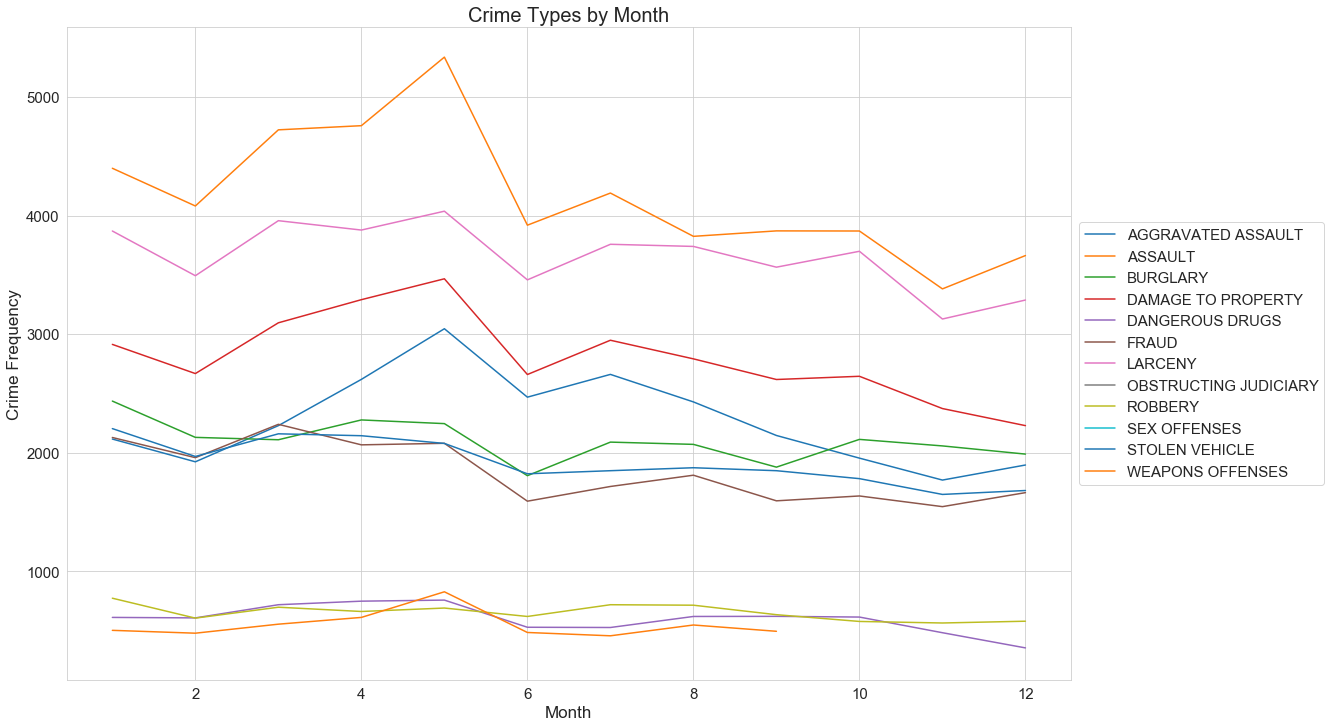

In [26]:
fig, ax = plt.subplots(figsize=(18,12))
crimedata.groupby('month')['offense_category'].apply(lambda x: x.value_counts().head(10)).unstack().plot(ax=ax)
plt.title('Crime Types by Month', fontsize = 20)
ax.set_xlabel('Month', fontsize = 17)
ax.set_ylabel('Crime Frequency', fontsize = 17)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={"size":15})

It appears that many of these crime types, assault especially, reach their yearly peak in May with a generally declining trend over the rest of the year. This could, perhaps, be attributed to a renewed interest in committing crime as the weather turns mild after a long Midwestern wintern, with relative fatigue setting in afterwards with the heat of summer and subsequent return to cold temperatures.  

### Crime Trends by Neighborhood and Council District

In [27]:
crimedata['neighborhood'].value_counts()

Warrendale           7857
Downtown             6511
Franklin Park        5318
Midtown              5055
Outer Drive-Hayes    4283
                     ... 
Arden Park             73
Virginia Park          73
Waterworks Park        44
Douglass               29
Belle Isle             25
Name: neighborhood, Length: 207, dtype: int64

These first five neighborhoods account for about 10.5% of total incidents.

Since 207 neighborhoods is too many for our plotting purposes, so let's focus on the 20 most affected.

In [28]:
#selecting top 20
top20_neigh = crimedata['neighborhood'].value_counts()[0:20]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text yticklabel objects>)

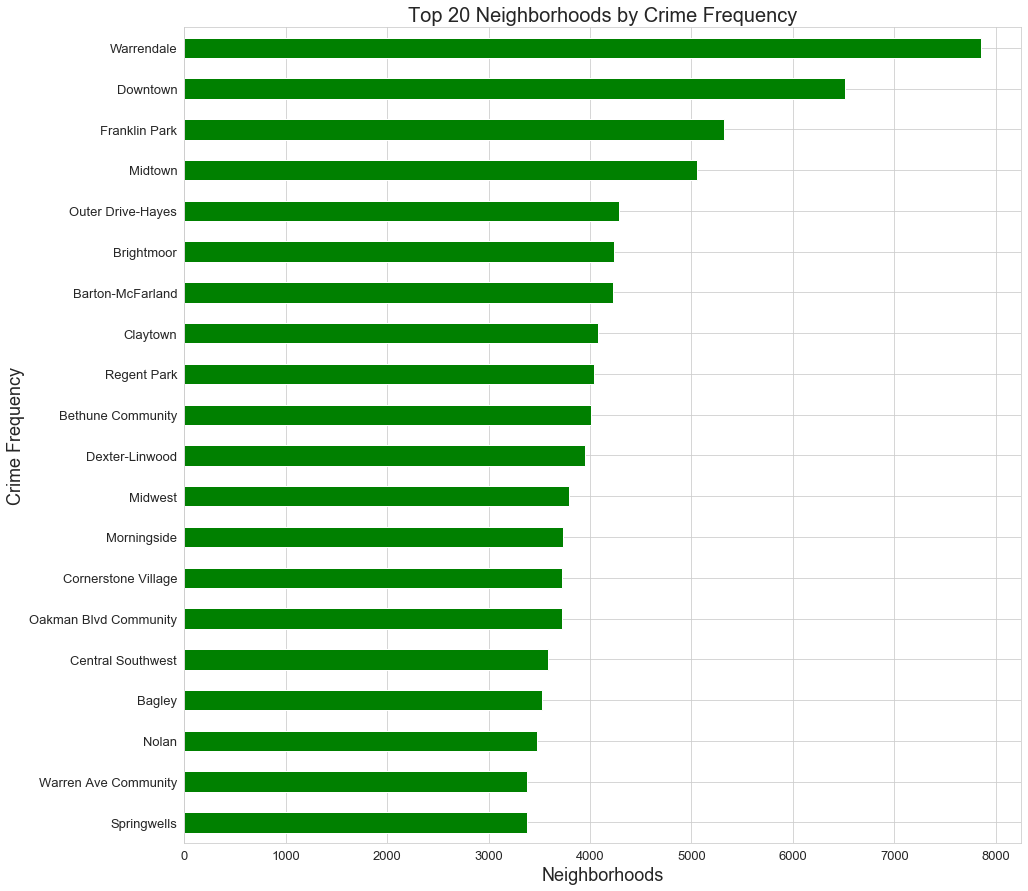

In [29]:
fig = plt.figure(figsize = (15, 15))
ax = top20_neigh.plot(kind='barh', color = 'green')
plt.gca().invert_yaxis()
plt.title("Top 20 Neighborhoods by Crime Frequency", fontsize = 20)
plt.xlabel("Neighborhoods", fontsize = 18)
plt.ylabel("Crime Frequency", fontsize = 18)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

The fact that the neighborhood of Warrendale, located in the western central region of Detroit, is the top result is not necessarily surprising, given that it is one of the largest neighborhoods in the city. 

Now let's turn to council districts, starting with total crime distribution.

In [30]:
crimedata['council_district'].value_counts()

7    43062
1    42327
5    40708
2    39341
4    37767
3    37190
6    36227
Name: council_district, dtype: int64

(array([    0., 10000., 20000., 30000., 40000., 50000.]),
 <a list of 6 Text yticklabel objects>)

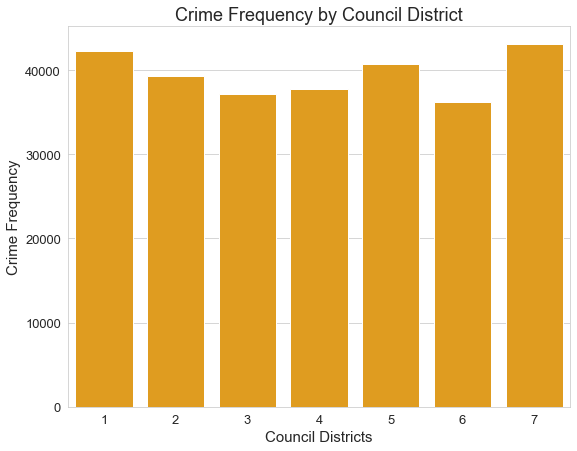

In [31]:
plt.figure(figsize=(9,7))
sns.countplot(crimedata['council_district'], color = 'orange')
plt.title('Crime Frequency by Council District', fontsize = 18)
plt.xlabel('Council Districts', fontsize = 15)
plt.ylabel('Crime Frequency', fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

Districts 7, 1, and 5 are the top three districts for crime freuquency, with 6 representing the lowest crime rate.

Let's drill down for a more granular look and see if districts experience similar or difference patterns of crime frequency across hour of the day.

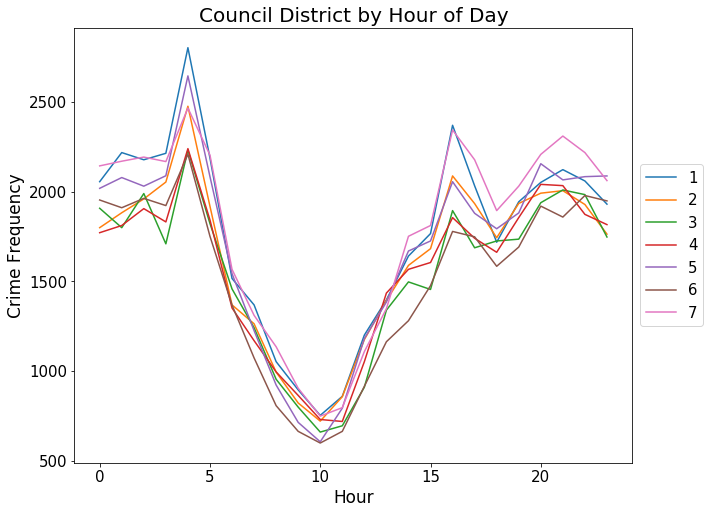

In [20]:
fig, ax = plt.subplots(figsize=(10,8))
crimedata.groupby('hour_of_day')['council_district'].apply(lambda x: x.value_counts().head(10)).unstack().plot(ax=ax)
plt.title('Council District by Hour of Day', fontsize = 20)
ax.set_xlabel('Hour', fontsize = 17)
ax.set_ylabel('Crime Frequency', fontsize = 17)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={"size":15})

Looks like the districts *do* follow the general pattern outlined in the previous "hour of day" graph, with some slight  differences in spike height, particularly for district 1. These spikes are especially noticeable around 4am and 4pm (previously noted as times of interest).

Let's shift to determining the ten most frequent crime types for each district.

In [32]:
crimedata.groupby('council_district')['offense_category'].apply(lambda x: x.value_counts().head(10))

council_district                    
1                 ASSAULT               7952
                  LARCENY               5689
                  DAMAGE TO PROPERTY    5201
                  BURGLARY              4329
                  AGGRAVATED ASSAULT    4243
                                        ... 
7                 STOLEN VEHICLE        3277
                  FRAUD                 3253
                  DANGEROUS DRUGS       1393
                  ROBBERY               1177
                  WEAPONS OFFENSES       891
Name: offense_category, Length: 70, dtype: int64

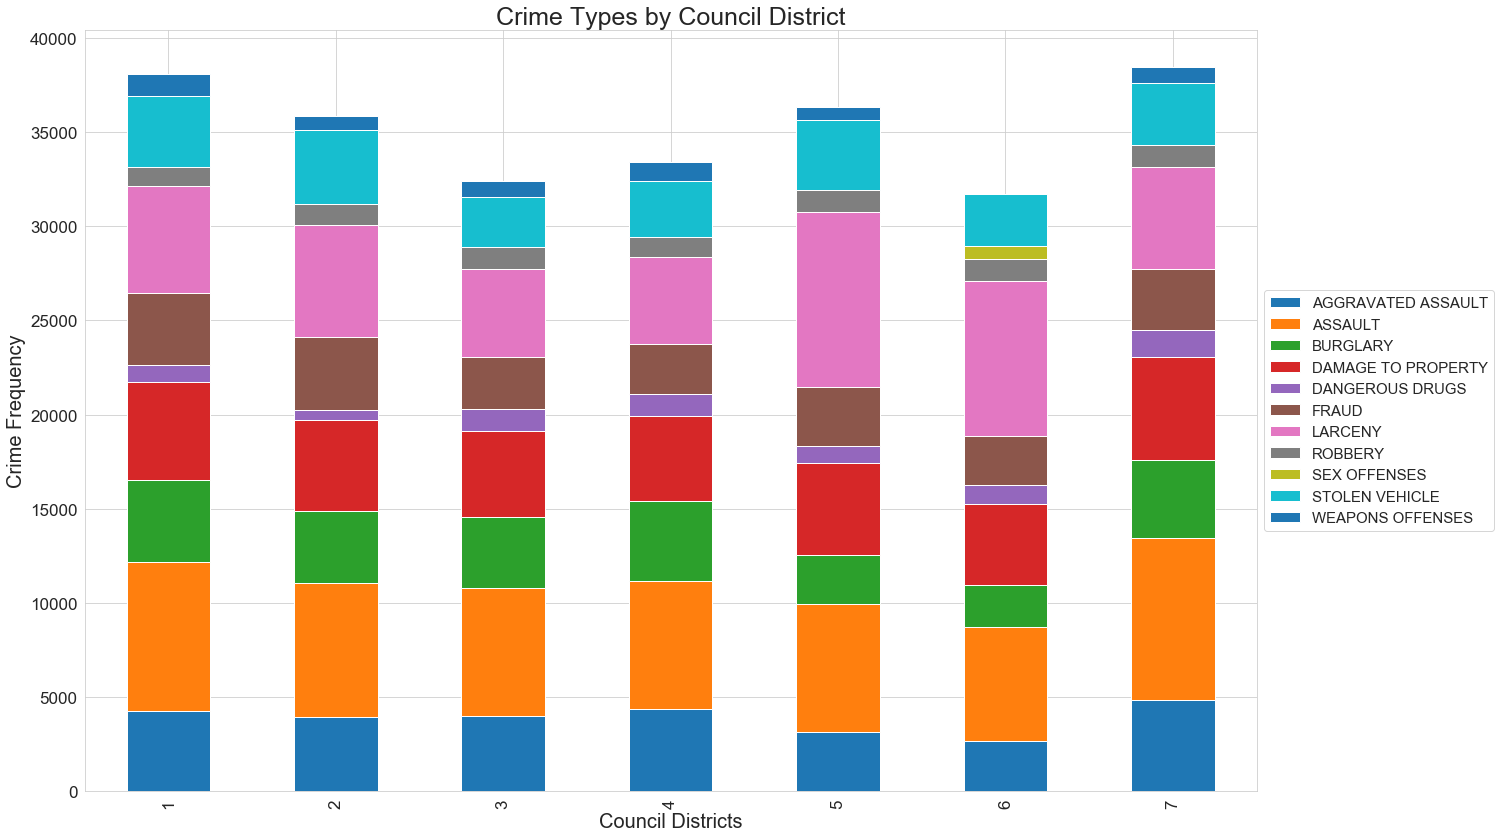

In [33]:
crimedata.groupby('council_district')['offense_category'].apply(lambda x: x.value_counts().head(10)).unstack().plot.bar(stacked=True,figsize=(21,14))
plt.title('Crime Types by Council District', fontsize = 25)
plt.xlabel('Council Districts', fontsize = 20)
plt.ylabel('Crime Frequency', fontsize = 20)
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={"size":15})

Overall, districts don't appear markedly different in their distribution of crime types. 5 and 6, which represent the  southern area of Detroit, do experience more larceny and slightly fewer burglaries.

Having looked at the distribution of broad crime categories across districts, let's dig into the data for a more granular look at a few select crime types of interest, as distributed across these same districts. In the next section, we will be looking at:

- Dangerous drugs
- Aggravated assault 
- Sex offenses
- Homicide

### Examining Dangerous Drugs, Aggravated Assault, Sex Offenses, and Homicide Across Council Districts

#### Dangerous Drugs

We'll set the stage by finding all unique types of drug crimes.

In [34]:
crimedata.loc[crimedata['offense_category'] == 'DANGEROUS DRUGS', 'offense_description'].unique()

array(['AGGRAVATED / FELONIOUS ASSAULT',
       'VIOLATION OF CONTROLED SUBSTANCE ACT - (VCSA)',
       'ENTRY WITHOUT PERMISSION (NO INTENT)', 'MARIJUANA -POSSESS',
       'MOTOR VEHICLE THEFT', 'LARCENY - OTHER', 'DAMAGE TO PROPERTY',
       'BURGLARY - FORCED ENTRY', 'BURGLARY - FORCED ENTRY -  RESIDENCE',
       'MOTOR VEHICLE AS STOLEN PROPERTY (RECOVERED ONLY)',
       'ASSAULT AND BATTERY/SIMPLE ASSAULT',
       'FRAUD - CREDIT CARD/AUTOMATIC TELLER MACHINE',
       'DAMAGE TO PRIVATE PROPERTY', 'LARCENY FROM GROUNDS',
       'FORGERY / COUNTERFEITING', 'STOLEN PROPERTY', 'HEROIN - POSSESS',
       'CSC 1ST DEGREE - ORAL / ANAL', 'RETAIL FRAUD - THEFT',
       'NARCOTIC EQUIPMENT VIOLATIONS', 'ROBBERY',
       'LARCENY - PERSONAL PROPERTY FROM MOTOR VEHICLE',
       'FRAUD - FALSE PRETENSE / SWINDLE / CONFIDENCE GAME',
       'BURGLARY - ENTRY WITHOUT FORCE (INTENT TO COMMIT)',
       'POSSESSION OF BURGLARY TOOLS', 'FRAUD - IMPERSONATION',
       'LARCENY - THEFT FROM BUILDING'

Easily apparent from this list is the seeming overlap between some of these drugs offense types (e.g. 'ASSAULT AND BATTERY/SIMPLE ASSAULT') and certain assault offenses. Whether this ambiguity is due to typos or lacksidaisical standards in classifying crime categories versus confusing, but otherwise legitimate classification choices (i.e. classifying an assault under the drug category if the choice to assault was heavily influenced by drug consumption) is not something we can verify in this context. While these discrepencies would likely need to be clarified (or otherwise fixed) in real-world practical applications, for the sake of proceeding with this exercise we will assume these classifications, and similar that may arise from other crime categories, are generally legitimate.

In [35]:
#finding top five tyoes of drug offenses for each council district
crimedata[crimedata.offense_category == 'DANGEROUS DRUGS'].groupby('council_district').offense_description.apply(lambda x: x.value_counts().head(5))

council_district                                                   
1                 VIOLATION OF CONTROLED SUBSTANCE ACT - (VCSA)         855
                  NARCOTIC EQUIPMENT VIOLATIONS                          19
                  ASSAULT AND BATTERY/SIMPLE ASSAULT                      9
                  AGGRAVATED / FELONIOUS ASSAULT                          8
                  DAMAGE TO PROPERTY                                      6
2                 VIOLATION OF CONTROLED SUBSTANCE ACT - (VCSA)         523
                  NARCOTIC EQUIPMENT VIOLATIONS                          20
                  MOTOR VEHICLE AS STOLEN PROPERTY (RECOVERED ONLY)       7
                  AGGRAVATED / FELONIOUS ASSAULT                          7
                  ASSAULT AND BATTERY/SIMPLE ASSAULT                      5
3                 VIOLATION OF CONTROLED SUBSTANCE ACT - (VCSA)        1106
                  NARCOTIC EQUIPMENT VIOLATIONS                          29
                  AS

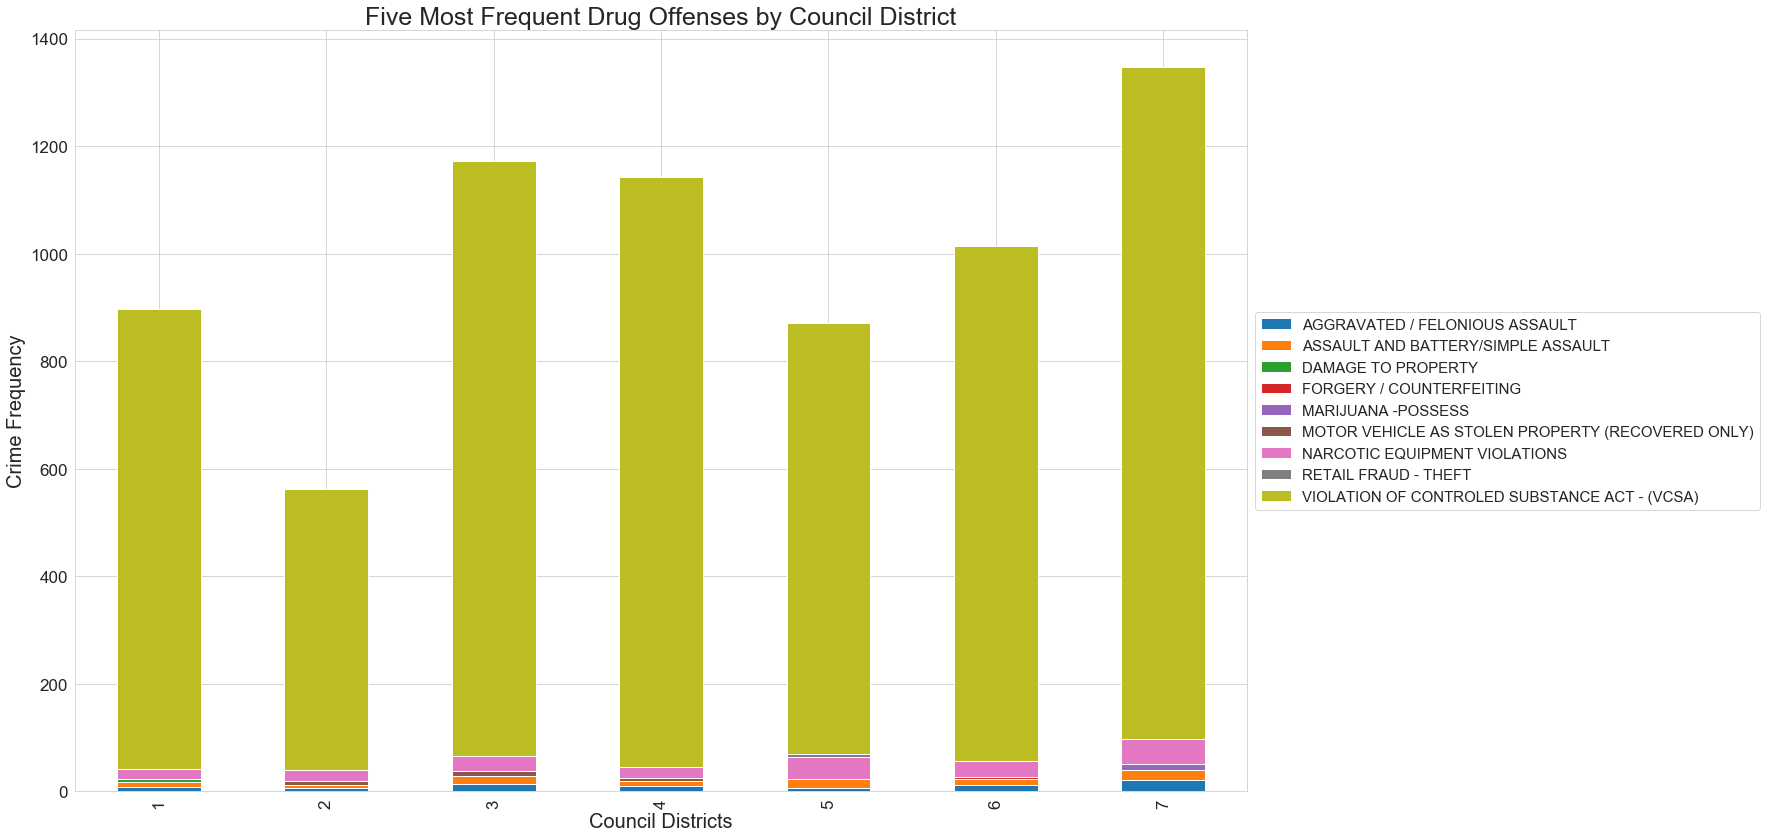

In [36]:
crimedata[crimedata.offense_category == 'DANGEROUS DRUGS'].groupby('council_district').offense_description.apply(lambda x: x.value_counts().head(5)).unstack().plot.bar(stacked=True,figsize=(21,14))
plt.title('Five Most Frequent Drug Offenses by Council District', fontsize = 25)
plt.xlabel('Council Districts', fontsize = 20)
plt.ylabel('Crime Frequency', fontsize = 20)
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={"size":15})

Regardless of the previously discussed disrepencies, it's obvious that VCSA offenses are far and away the most prevalent drug crime across all districts. 'Narcotic equipment violations' appear to be the next most frequent. Overall, districts 7, 3, and 4 are the three most heavily impacted by drug offenses, with 7 facing more than twice the number of offenses as 2.

#### Aggravated Assault

In [37]:
crimedata.loc[crimedata['offense_category'] == 'AGGRAVATED ASSAULT', 'offense_description'].unique()

array(['ROBBERY', 'AGGRAVATED / FELONIOUS ASSAULT', 'PARENTAL KIDNAPPING',
       'MURDER / NON-NEGLIGENT MANSLAUGHTER (VOLUNTARY)',
       'ASSAULT AND BATTERY/SIMPLE ASSAULT', 'KIDNAPPING / ABDUCTION',
       'CSC 4TH DEGREE - FORCIBLE CONTACT',
       'NEGLIGENT HOMICIDE - VEHICLE / BOAT / SNOWMOBILE / ORV',
       'CSC 2ND DEGREE - FORCIBLE CONTACT',
       'CSC 1ST DEGREE - ORAL / ANAL',
       'AGGRAVATED / FELONIOUS ASSAULT (DOMESTIC)',
       'ASSAULT LESS THAN MURDER', ' ', 'CSC 1ST DEGREE - PENIS / VAGINA',
       'CITIZEN ASSIST'], dtype=object)

In [38]:
crimedata[crimedata.offense_category == 'AGGRAVATED ASSAULT'].groupby('council_district').offense_description.apply(lambda x: x.value_counts().head(5))

council_district                                                 
1                 AGGRAVATED / FELONIOUS ASSAULT                     4163
                  ASSAULT AND BATTERY/SIMPLE ASSAULT                   48
                  MURDER / NON-NEGLIGENT MANSLAUGHTER (VOLUNTARY)      19
                  KIDNAPPING / ABDUCTION                                6
                  ROBBERY                                               6
2                 AGGRAVATED / FELONIOUS ASSAULT                     3873
                  ASSAULT AND BATTERY/SIMPLE ASSAULT                   47
                  MURDER / NON-NEGLIGENT MANSLAUGHTER (VOLUNTARY)      29
                  KIDNAPPING / ABDUCTION                                5
                  ROBBERY                                               4
3                 AGGRAVATED / FELONIOUS ASSAULT                     3929
                  ASSAULT AND BATTERY/SIMPLE ASSAULT                   56
                  MURDER / NON-NEGLIGENT MANSL

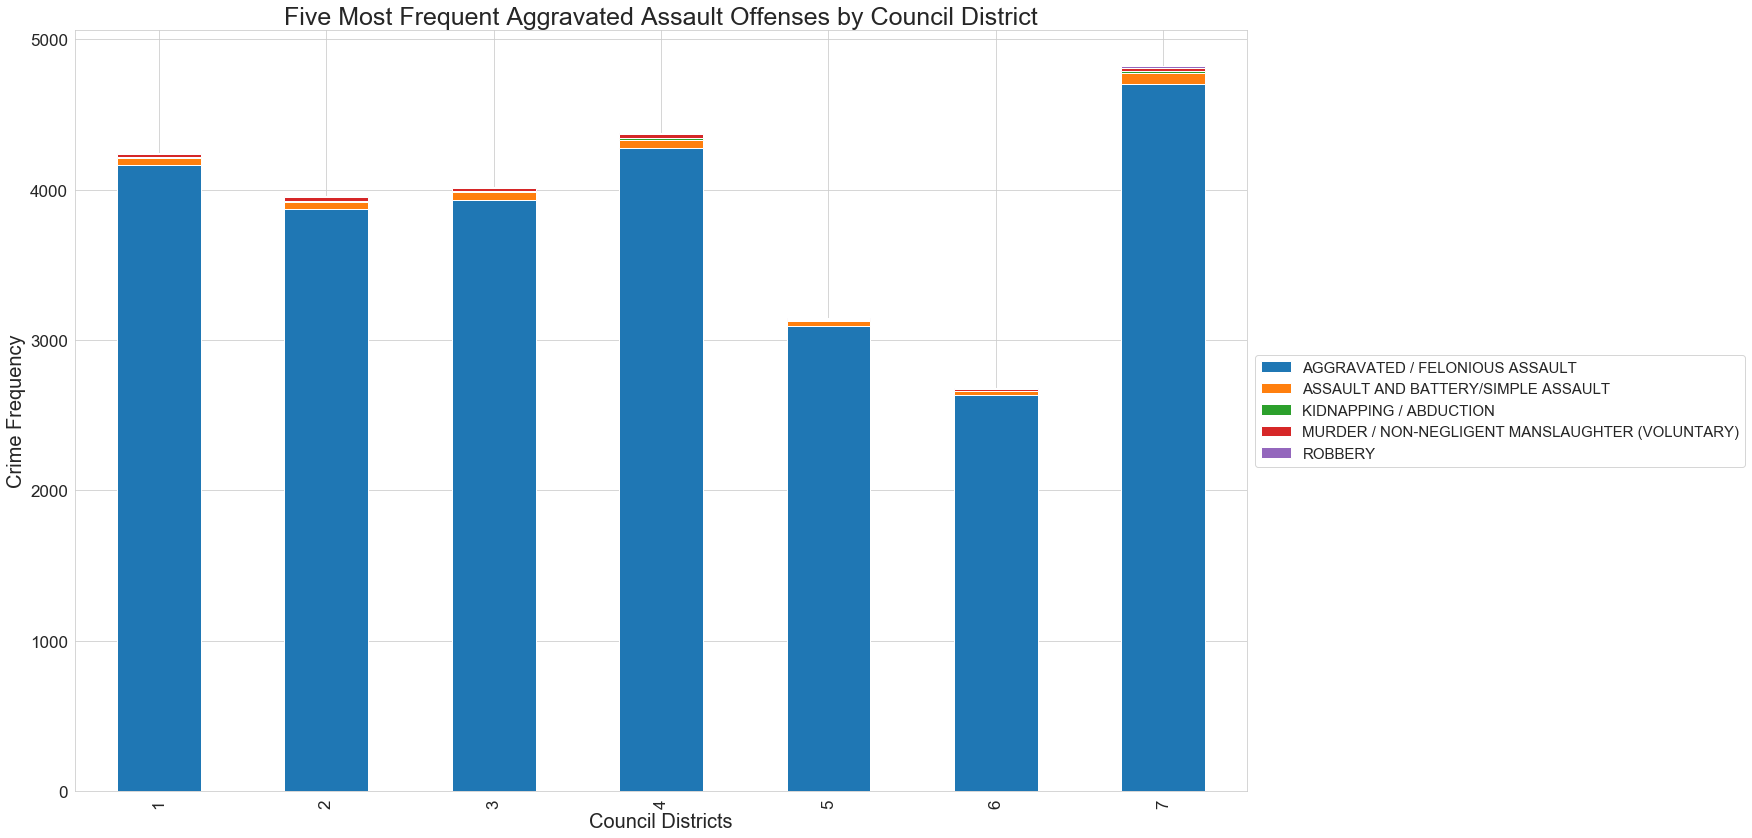

In [39]:
crimedata[crimedata.offense_category == 'AGGRAVATED ASSAULT'].groupby('council_district').offense_description.apply(lambda x: x.value_counts().head(5)).unstack().plot.bar(stacked=True,figsize=(21,14))
plt.title('Five Most Frequent Aggravated Assault Offenses by Council District', fontsize = 25)
plt.xlabel('Council Districts', fontsize = 20)
plt.ylabel('Crime Frequency', fontsize = 20)
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={"size":15})

General felonious assault offenses dominate the distribution, with 7 seeing the most, roughly 1.5 times as much as 6, which experiences the lowest rates of any type of aggravated assualt offenses. 5 experiences the next lowest rates, demonstrating that the southern area of detroit, as represented by these districts, experiences the fewest reported aggravated assaults. 

#### Sex Offenses

In [40]:
crimedata.loc[crimedata['offense_category'] == 'SEX OFFENSES', 'offense_description'].unique()

array(['CSC 2ND DEGREE - FORCIBLE CONTACT', 'KIDNAPPING / ABDUCTION',
       'CSC 4TH DEGREE - FORCIBLE CONTACT',
       'SEXUAL PENETRATION NONFORCIBLE - BLOOD / AFFINITY',
       'SEXUAL PENETRATION NONFORCIBLE - OTHER',
       'COMMERCIALIZED SEX - PROSTITUTION',
       'VIOLATION OF CONTROLED SUBSTANCE ACT - (VCSA)',
       'FRAUD - CREDIT CARD/AUTOMATIC TELLER MACHINE',
       'COMMERCIALIZED SEX - ASSISTING / PROMOTING PROSTITUTION',
       'SEX OFFENSE - OTHER', 'AGGRAVATED / FELONIOUS ASSAULT',
       'ASSAULT AND BATTERY/SIMPLE ASSAULT', 'INDECENT EXPOSURE',
       'CSC 1ST DEGREE - ORAL / ANAL', 'LARCENY - THEFT FROM BUILDING',
       'INTIMIDATION / STALKING', 'LARCENY - OTHER',
       'FAMILY - ABUSE / NEGLECT NONVIOLENT',
       'MOTOR VEHICLE AS STOLEN PROPERTY (RECOVERED ONLY)',
       'CSC 3RD DEGREE - ORAL / ANAL', 'BURGLARY - FORCED ENTRY'],
      dtype=object)

Note: "CSC" refers to "criminal sexual conduct".

In [41]:
crimedata[crimedata.offense_category == 'SEX OFFENSES'].groupby('council_district').offense_description.apply(lambda x: x.value_counts().head(5))

council_district                                                         
1                 COMMERCIALIZED SEX - PROSTITUTION                          449
                  CSC 2ND DEGREE - FORCIBLE CONTACT                          136
                  CSC 4TH DEGREE - FORCIBLE CONTACT                           74
                  SEX OFFENSE - OTHER                                         53
                  COMMERCIALIZED SEX - ASSISTING / PROMOTING PROSTITUTION      4
2                 COMMERCIALIZED SEX - PROSTITUTION                          223
                  CSC 2ND DEGREE - FORCIBLE CONTACT                          114
                  CSC 4TH DEGREE - FORCIBLE CONTACT                           89
                  SEX OFFENSE - OTHER                                         46
                  COMMERCIALIZED SEX - ASSISTING / PROMOTING PROSTITUTION      3
3                 COMMERCIALIZED SEX - PROSTITUTION                          575
                  CSC 2ND DEGREE - 

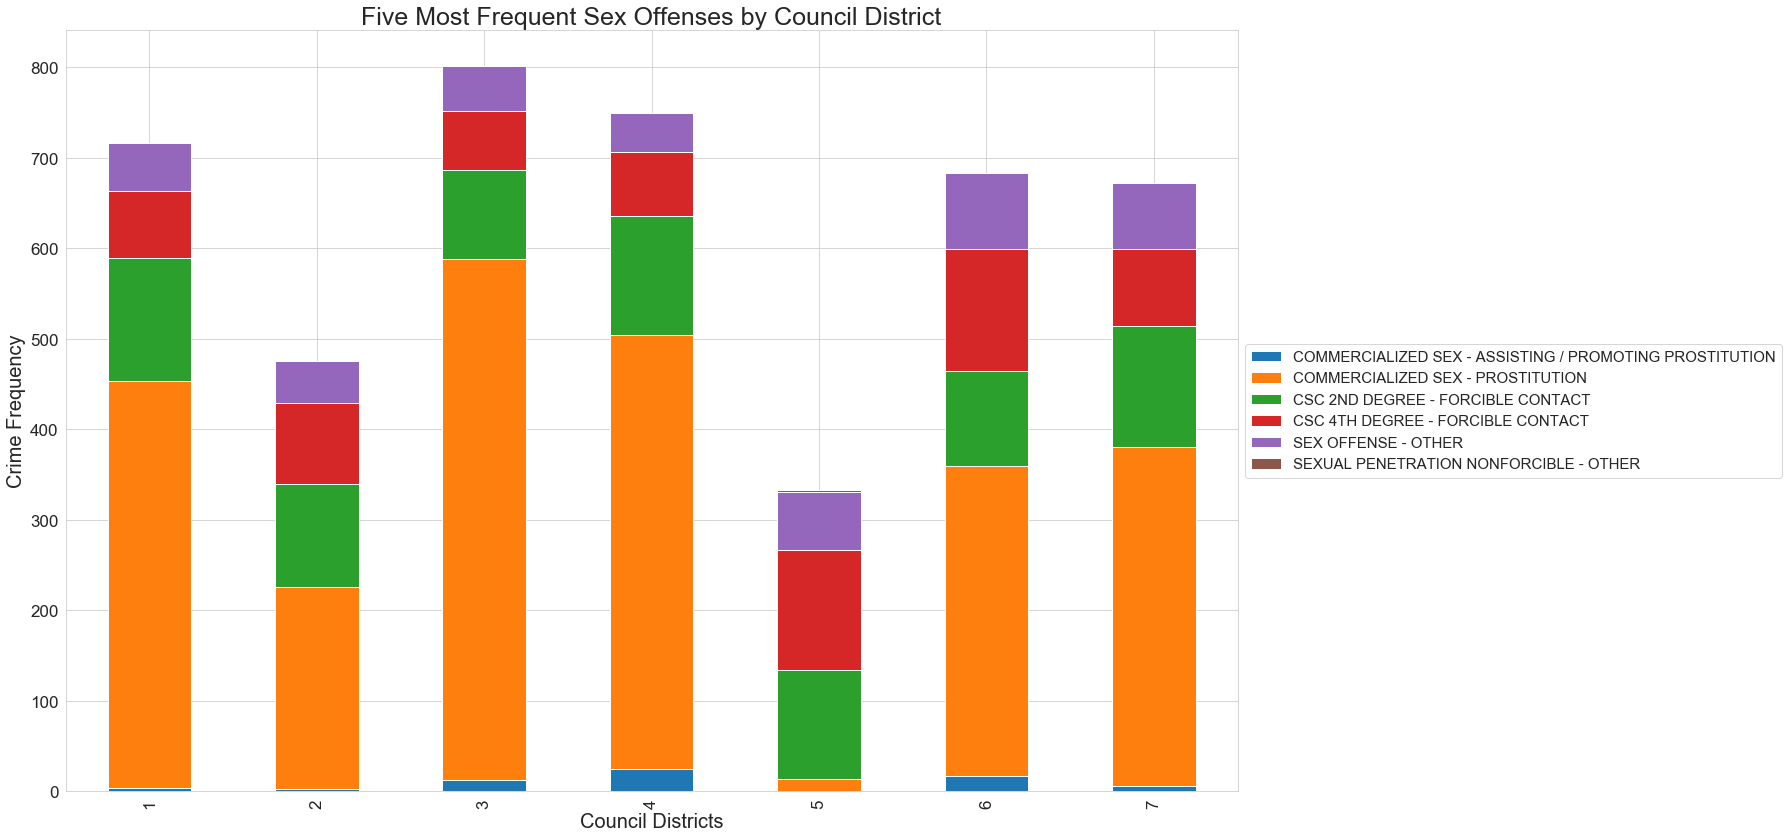

In [42]:
crimedata[crimedata.offense_category == 'SEX OFFENSES'].groupby('council_district').offense_description.apply(lambda x: x.value_counts().head(5)).unstack().plot.bar(stacked=True,figsize=(21,14))
plt.title('Five Most Frequent Sex Offenses by Council District', fontsize = 25)
plt.xlabel('Council Districts', fontsize = 20)
plt.ylabel('Crime Frequency', fontsize = 20)
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={"size":15})

Prostitution appears to be the most frequent type of sex offense across all but district 5, which is primarily definited by 2nd and 4th degree CSC offenses and has seen few report of prositition. District 3 represents the highest rate, experiencing almost 2.5x as many offenses as district 5. 

#### Homicide

In [43]:
crimedata.loc[crimedata['offense_category'] == 'HOMICIDE', 'offense_description'].unique()

array(['MURDER / NON-NEGLIGENT MANSLAUGHTER (VOLUNTARY)',
       'NEGLIGENT HOMICIDE - VEHICLE / BOAT / SNOWMOBILE / ORV',
       'NEGLIGENT HOMICIDE / MANSLAUGHTER (INVOLUNTARY)'], dtype=object)

In [44]:
#since there are only three types of homicide offenses, we don't have to worry about limiting our values counts
crimedata[crimedata.offense_category == 'HOMICIDE'].groupby('council_district').offense_description.apply(lambda x: x.value_counts())

council_district                                                        
1                 MURDER / NON-NEGLIGENT MANSLAUGHTER (VOLUNTARY)           109
                  NEGLIGENT HOMICIDE - VEHICLE / BOAT / SNOWMOBILE / ORV      8
                  NEGLIGENT HOMICIDE / MANSLAUGHTER (INVOLUNTARY)             1
2                 MURDER / NON-NEGLIGENT MANSLAUGHTER (VOLUNTARY)           132
                  NEGLIGENT HOMICIDE - VEHICLE / BOAT / SNOWMOBILE / ORV      6
                  NEGLIGENT HOMICIDE / MANSLAUGHTER (INVOLUNTARY)             1
3                 MURDER / NON-NEGLIGENT MANSLAUGHTER (VOLUNTARY)           133
                  NEGLIGENT HOMICIDE - VEHICLE / BOAT / SNOWMOBILE / ORV      6
4                 MURDER / NON-NEGLIGENT MANSLAUGHTER (VOLUNTARY)           122
                  NEGLIGENT HOMICIDE - VEHICLE / BOAT / SNOWMOBILE / ORV      9
5                 MURDER / NON-NEGLIGENT MANSLAUGHTER (VOLUNTARY)           106
                  NEGLIGENT HOMICIDE - VEHICLE 

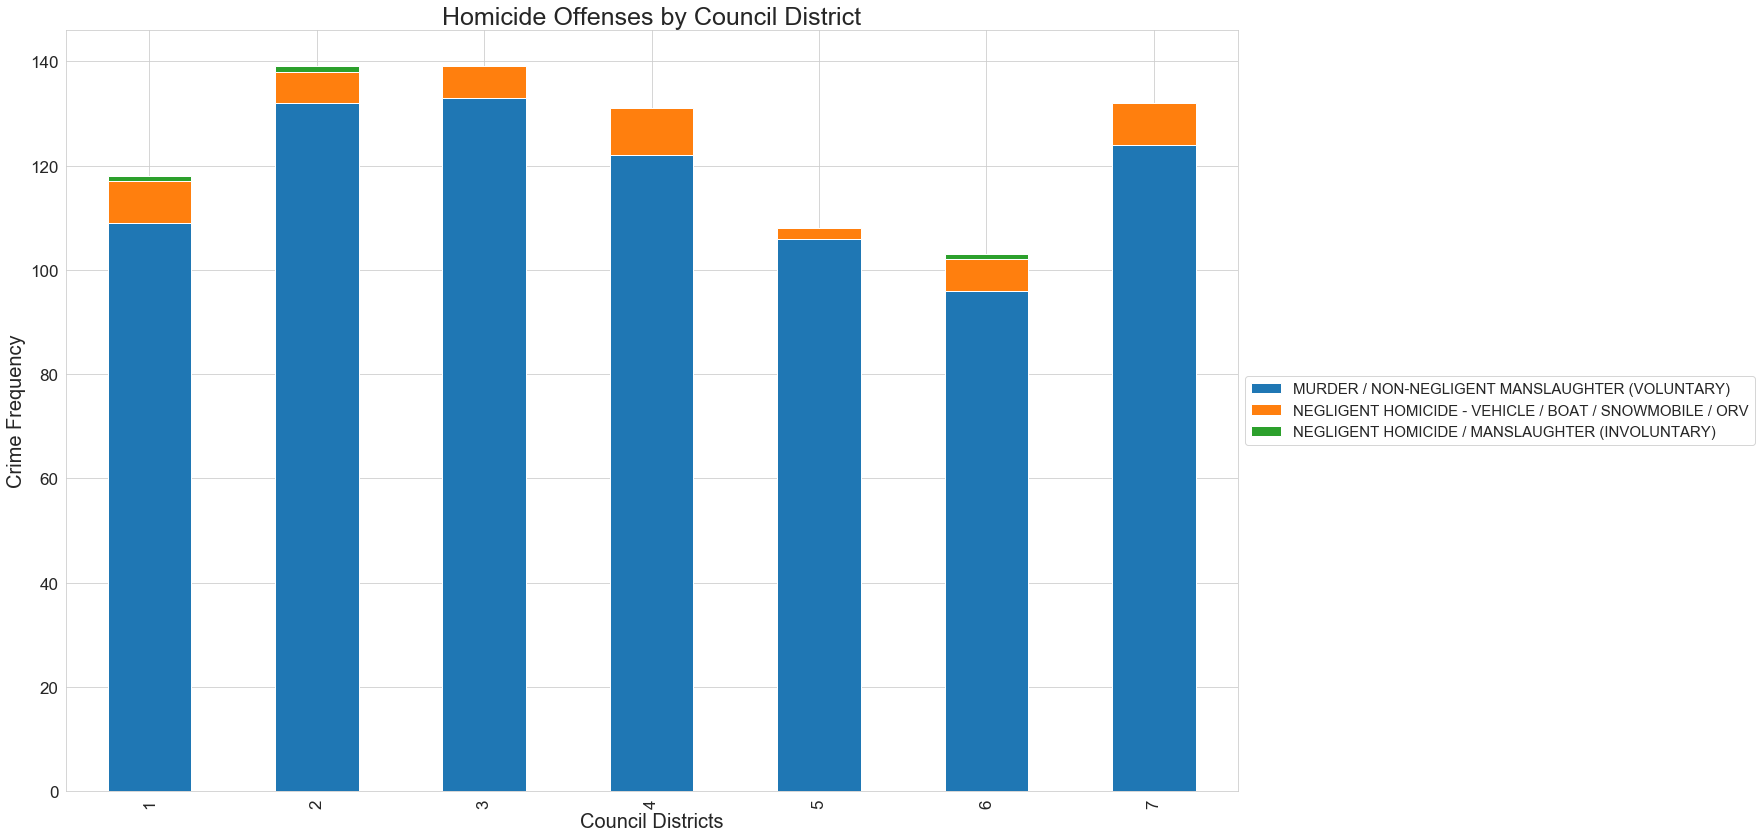

In [45]:
crimedata[crimedata.offense_category == 'HOMICIDE'].groupby('council_district').offense_description.apply(lambda x: x.value_counts()).unstack().plot.bar(stacked=True,figsize=(21,14))
plt.title('Homicide Offenses by Council District', fontsize = 25)
plt.xlabel('Council Districts', fontsize = 20)
plt.ylabel('Crime Frequency', fontsize = 20)
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={"size":15})

Voluntary murder/non-negligent manslaughter takes up the vast majority of the distribution, with districts 2 and 3 effectively demonstrating the same rate and 6 experiencing the lowest rate.

## III. Hypothesis Testing

Now that we have completed our descriptive analysis, let's draw a testable hypothesis from our observations. From our graph of crime frequencies per hour across council districts, we noticed that the district 1 stood out somewhat from the rest. We can use the **ANOVA test** to ascertain whether the group (council) means for hour are statistically different from each other, particularly in the case of district 1.


We can state our hypotheses as the following:

- $H_0$: There is **not** a statistically meaningful difference beteen council districts; their means are equal.
- $H_A$: There **is** a statistically meaningful difference beteen council districts; at least one mean is not equal. 

We will use the significance level of **α** = 0.05

In [23]:
#Running our test
from statsmodels.formula.api import ols
import statsmodels.api as sm
model = ols('hour_of_day ~ council_district', data=crimedata).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq        df          F    PR(>F)
council_district  6.749825e+02       1.0  11.966385  0.000542
Residual          1.560318e+07  276620.0        NaN       NaN

Our p-value is incredibly small, thus indicating that we can safely reject the null and accept that there is a statistically meaningful difference present. Of course, this test alone does not tell us *what* district(s) are different; however, we can utilize post-hoc analysis methods to determine which group pairs are significant. In our case, we can use the **Tukey HSD Test** to perform a multiple pairwise comparison. 

In [25]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
pairs = pairwise_tukeyhsd(endog=crimedata['hour_of_day'], groups=crimedata['council_district'], alpha=0.05)
print(pairs)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.2188  0.001  0.0637 0.3738   True
     1      3   0.2188  0.001  0.0615 0.3762   True
     1      4   0.3153  0.001  0.1586  0.472   True
     1      5    0.193  0.004  0.0393 0.3467   True
     1      6   0.1711 0.0246  0.0126 0.3296   True
     1      7   0.2542  0.001  0.1027 0.4058   True
     2      3   0.0001    0.9 -0.1601 0.1602  False
     2      4   0.0965 0.5505  -0.063  0.256  False
     2      5  -0.0258    0.9 -0.1823 0.1308  False
     2      6  -0.0477    0.9 -0.2089 0.1136  False
     2      7   0.0355    0.9  -0.119 0.1899  False
     3      4   0.0965 0.5657 -0.0653 0.2582  False
     3      5  -0.0258    0.9 -0.1846  0.133  False
     3      6  -0.0477    0.9 -0.2112 0.1157  False
     3      7   0.0354    0.9 -0.1213 0.1921  False
     4      5  -0.1223 0.2542 -0.2805 0.0359  False
     4      

### Conclusion

As suspected, district 1 is significantly different in terms of mean compared to the other districts! In terms of practical ramifications, Detroit city officials can use this finding to inform their decisions on whether district 1 would benefit from increased anti-crime resources.

## IV. Summary 

### Summary
From this dataset, as analyzed from 2017, we learned several things about crime frequencies, time trends, and crime distributions across neighborhoods and council districts. In summation:

#### Overall Types and Frequencies of Crimes
- Assault, larceny, damage to property, aggravated assault, and burglary, respectively, represent the five most frequenctly occuring broad crime categories. Cumulatively, they account for about 65% of all crime.

#### Crime Across Time
 - Crime rates appear to seasonally fluctuate. 
 - Crime distribution across days of the week demonstrates only a marginal upward trajectory. 
     - Assault and damage to property tend to occur more on the weekend, while burglaries and fraud rates dip. 
 - Crime peaks in the late night and early morning hours, with lowest rates experiences at midday. 
     - Many of the most frequently occuring crime types, including assault, aggravated assault, and larcency, spike around 4am.
 - Most of the ten most frequent types of crime peak in May, particularly assault, with a general decline following.
     
#### Crime Trends by Neighborhood and Council District
- Warrendale, Downtown, Franklin Park, Midtown, and Outer Drive-Bayes are top five neighborhoods with highest crime rates. Collectively, they account for 10.5% of total crime incidents. 
- Council district 7 experiences the highest crime rate, while 6 represents the lowest. 
- Crime distribution across districts for the 10 most frequently occuring types of crime appears generally consistent. 
    - Districts 5 and 6 experience noticably more larceny than the others, and fewer burglaries.  
 
#### Examining Dangerous Drugs, Aggravated Assault, Sex Offenses, and Homicide Across Council Districts
- Dangerous Drugs:
    - Offenses that were in violation of the controlled substance act (VCSA) represented the vast majority of drug offenses across districts. District 7 experiences the most drug offenses overall, about 2.5x as much as district 2, which experienced the lowest rate.
- Aggravated Assault:
    - Felonious assaults define the considerable majority of the distribution. District 7 experiences the highest rate of aggravated assaults, about 1.5x as many as district 6, which experienced the lowest rate. 
    - The southern area of Detroit, as represented by districts 5 and 6, experiences the lowest rates of aggravated assault as compared the other areas of the city.
- Sex Offenses
    - Commercialized prostitution is the most frequent type of sex offense across all districts, with the exception of district 5, which experienced very little, instead primarily defined by CSC forcible contact offenses. 5 still showed the lowest overall rate. 
- Homicide
    - The majority of the distribution for all districts is represented by murder/non-negligent homicide. Districts 2 and 3 represented the highest rates, while 6 experienced the lowest. 
    
#### Hypothesis - is there a meaningful difference between council districts in crime frequency across hour of day?
- **Yes** - there is a statistically meaningful difference, in particular with district 1. 